In [78]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
digits = load_digits()
digits.data.shape

(1797, 64)

1797

In [37]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [31]:
df = pd.DataFrame(projected)

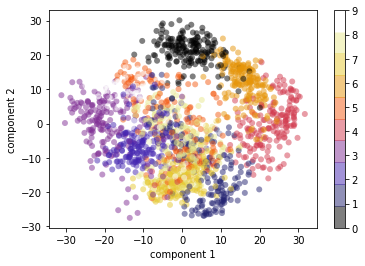

In [43]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('CMRmap', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


In [72]:
titanic_df = pd.read_csv('./titanic.csv')
titanic_df.dropna(inplace=True)

y = titanic_df['Survived']

titanic_df.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Survived'],inplace=True,axis=1)

titanic_df = pd.get_dummies(titanic_df)
titanic_df.head()
len(titanic_df)

183

In [94]:
#PCA for this dataframe
pca = PCA(3)
pca.fit(titanic_df)
 #
print(' Explained variance is: {}\n the components are: {}'.format(pca.explained_variance_,pca.components_))

X_pca = pca.transform(titanic_df)
print("original shape:   ", titanic_df.shape)
print("transformed shape:", X_pca.shape)

 Explained variance is: [5.83133026e+03 2.42633102e+02 4.89813461e-01]
 the components are: [[-2.11760300e-03 -1.97578493e-02  2.42081551e-03  3.86109498e-03
   9.99791425e-01  8.60413157e-04 -8.60413157e-04]
 [-1.12023153e-02  9.99630868e-01 -5.34890017e-03 -1.13933659e-02
   1.97975052e-02 -5.58009507e-03  5.58009507e-03]
 [-7.45516490e-02 -1.53259280e-02 -3.92918092e-01 -6.01932208e-01
   3.65620346e-03 -4.88613748e-01  4.88613748e-01]]
original shape:    (183, 7)
transformed shape: (183, 3)


In [96]:
# Using Naive bayes to predict survived or nah
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, random_state=42)
clf = model.fit(X_train, y_train)
test_pred = clf.predict(X_test)
#lets get the f1 score!
f1_score(test_pred,y_test) #80% not bad for basically fooling around

0.8095238095238095